In [1]:
%matplotlib inline

import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from get_aq_data import get_flo_data, ID_to_name

In [3]:
data, hourly_mean, daily_mean = get_flo_data()

In [4]:
all_site_daily_mean = daily_mean['2019-05-01':].mean(axis=1)

In [5]:
weekday_index = all_site_daily_mean[(all_site_daily_mean.index.dayofweek >= 0) & (all_site_daily_mean.index.dayofweek <= 4)].index
weekend_index = all_site_daily_mean[all_site_daily_mean.index.dayofweek >= 5].index

In [6]:
all_site_daily_mean = all_site_daily_mean.to_frame('Mean')

In [7]:
all_site_daily_mean.loc[weekday_index, 'Weekend'] = 'Weekday'
all_site_daily_mean.loc[weekend_index, 'Weekend'] = 'Weekend'

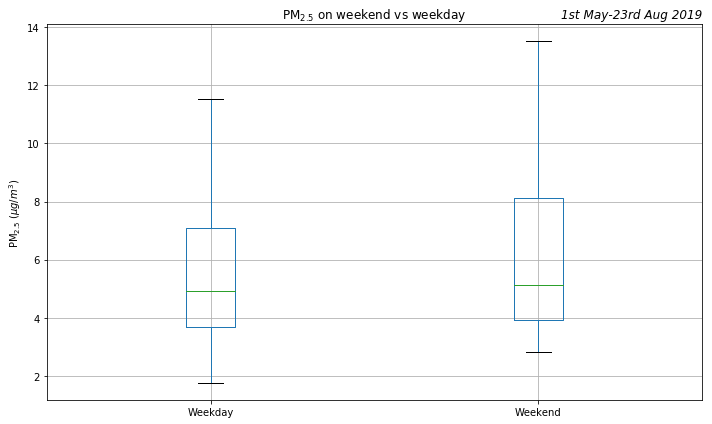

In [8]:
all_site_daily_mean.boxplot(by='Weekend', showfliers=False, figsize=(10,6))
plt.suptitle('')
plt.title('$\mathrm{PM}_{2.5}$ on weekend vs weekday')
plt.title('1st May-23rd Aug 2019', loc='right', fontstyle='italic')
plt.ylabel(r'$\mathrm{PM}_{2.5}$ ($\mu g / m^3$)')
plt.xlabel('')
plt.tight_layout()
#plt.savefig('graphs/WeekendVsWeekday.png', dpi=300)

In [10]:
import seaborn as sns

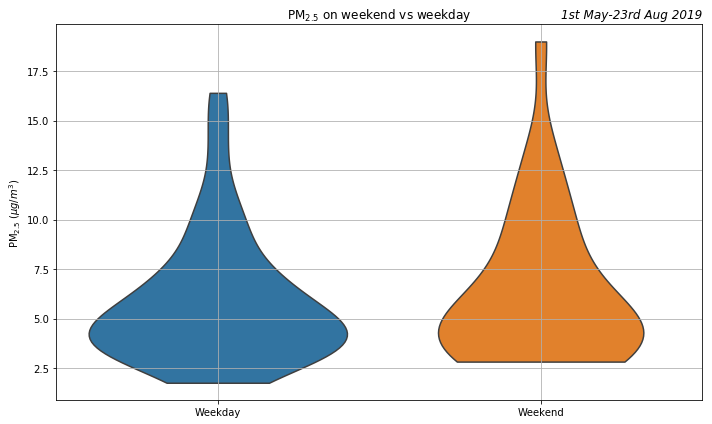

In [11]:
plt.figure(figsize=(10, 6))
sns.violinplot(x='Weekend', y='Mean', data=all_site_daily_mean, cut=0, inner=None)
plt.grid()
plt.xlabel('')
plt.title('$\mathrm{PM}_{2.5}$ on weekend vs weekday')
plt.title('1st May-23rd Aug 2019', loc='right', fontstyle='italic')
plt.ylabel(r'$\mathrm{PM}_{2.5}$ ($\mu g / m^3$)')
plt.tight_layout()
#plt.savefig('graphs/WeekendVsWeekday_Violin.png', dpi=300)